In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

iris = load_iris()
print(iris.keys())
print('iris target 이름:',iris.target_names)

iris_data= iris.data  #독립변수
iris_label= iris.target #종속변수

iris_df= pd.DataFrame(data= iris.data , columns=iris.feature_names)
iris_df['label']= iris.target
iris_df.head()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris target 이름: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                   test_size=0.2,
                                                   random_state=11)

In [5]:
# 학습 수행
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=156)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [6]:
# 예측 수행
pred = dt_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


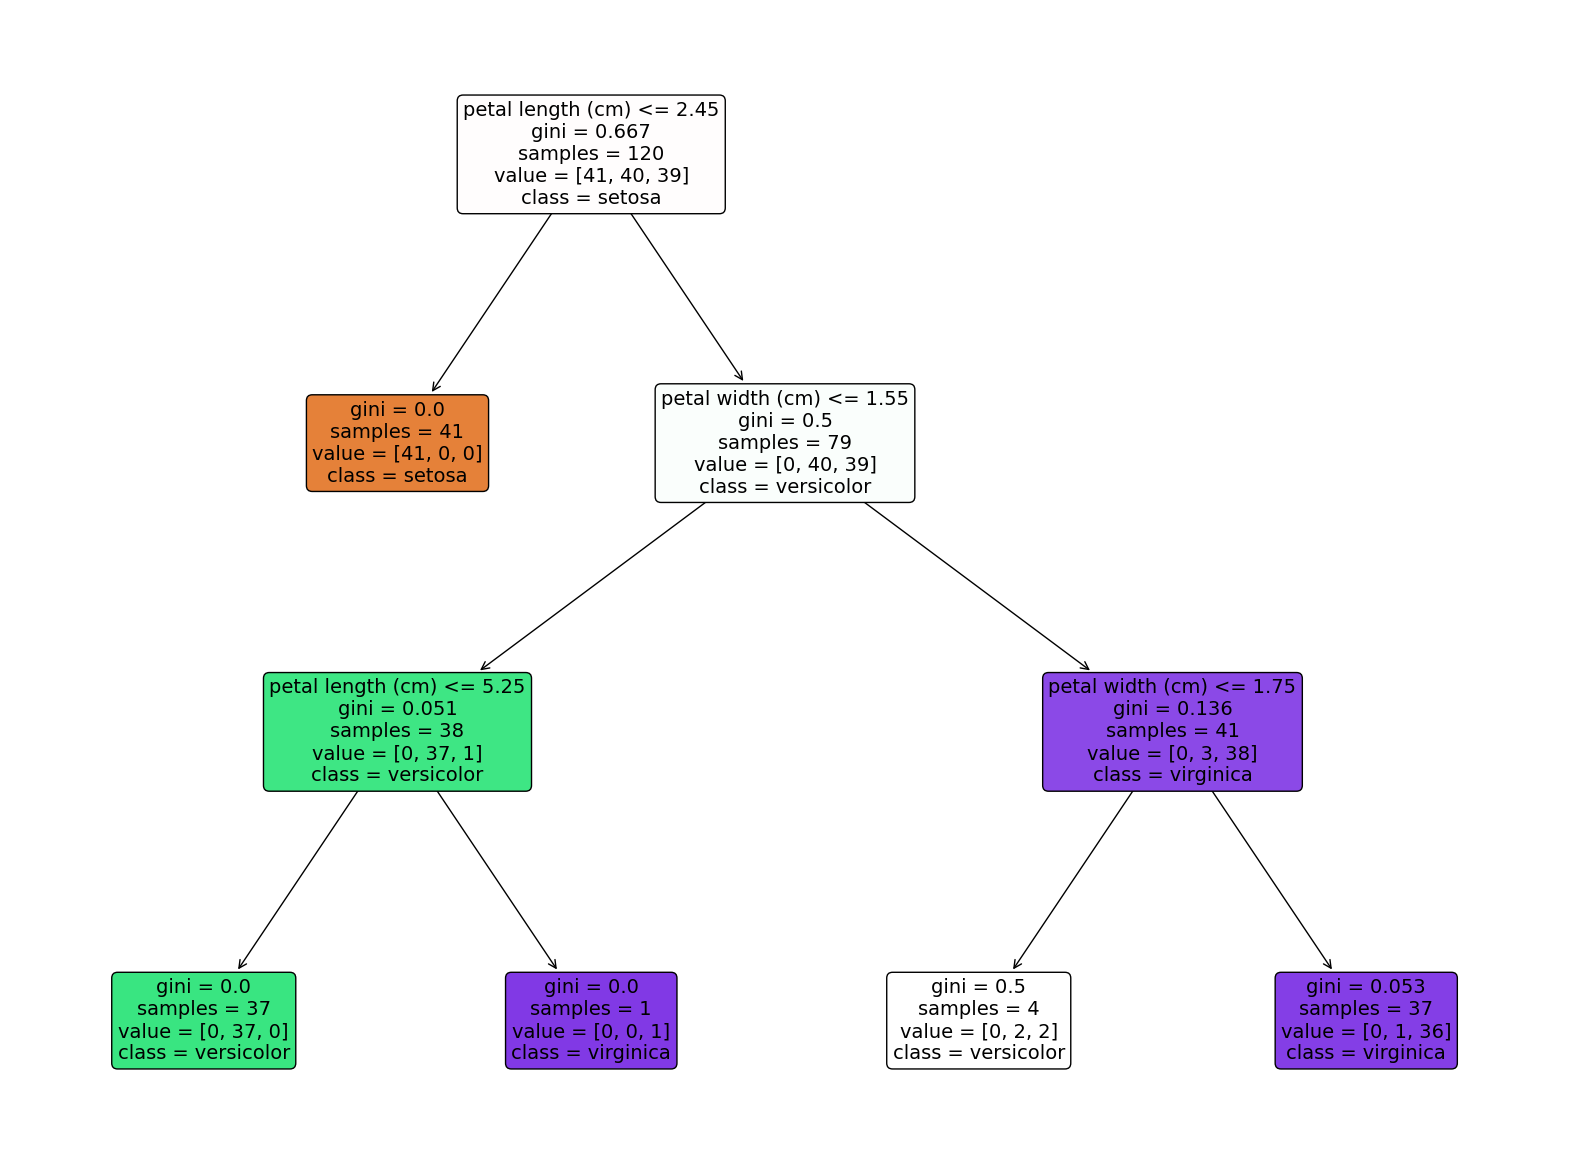

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf,filled=True,
              feature_names = iris.feature_names,
              class_names = iris.target_names,
              rounded=True,
              fontsize=14)
plt.show()

In [9]:
dt_clf = DecisionTreeClassifier ( criterion = 'gini',max_depth=3,random_state=156)
dt_clf.fit(X_train,y_train)

pred=dt_clf.predict(X_test)

In [10]:
import seaborn as sns
import numpy as np

# feature별 importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

#시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

Feature importances:
[0.    0.    0.558 0.442]
sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.558
petal width (cm):0.442


<AxesSubplot:>